### Added 10% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'\nADDING 10% TO FEATURE \n')

df = sanity_checks_methods.duplicates_values(df, 10)
sanity_checks_methods.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 10% TO FEATURE 

Number of rows:  10982
Duplicate Counts:  998
Percentage of Duplicate Values:  9.087597887452196


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3818
           1       0.97      1.00      0.98      3869

    accuracy                           0.98      7687
   macro avg       0.98      0.98      0.98      7687
weighted avg       0.98      0.98      0.98      7687

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1668
           1       0.93      0.99      0.96      1627

    accuracy                           0.96      3295
   macro avg       0.96      0.96      0.96      3295
weighted avg       0.96      0.96      0.96      3295

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4999
           1       0.96      1.00      0.98      4985

    accuracy                           0.97      9984


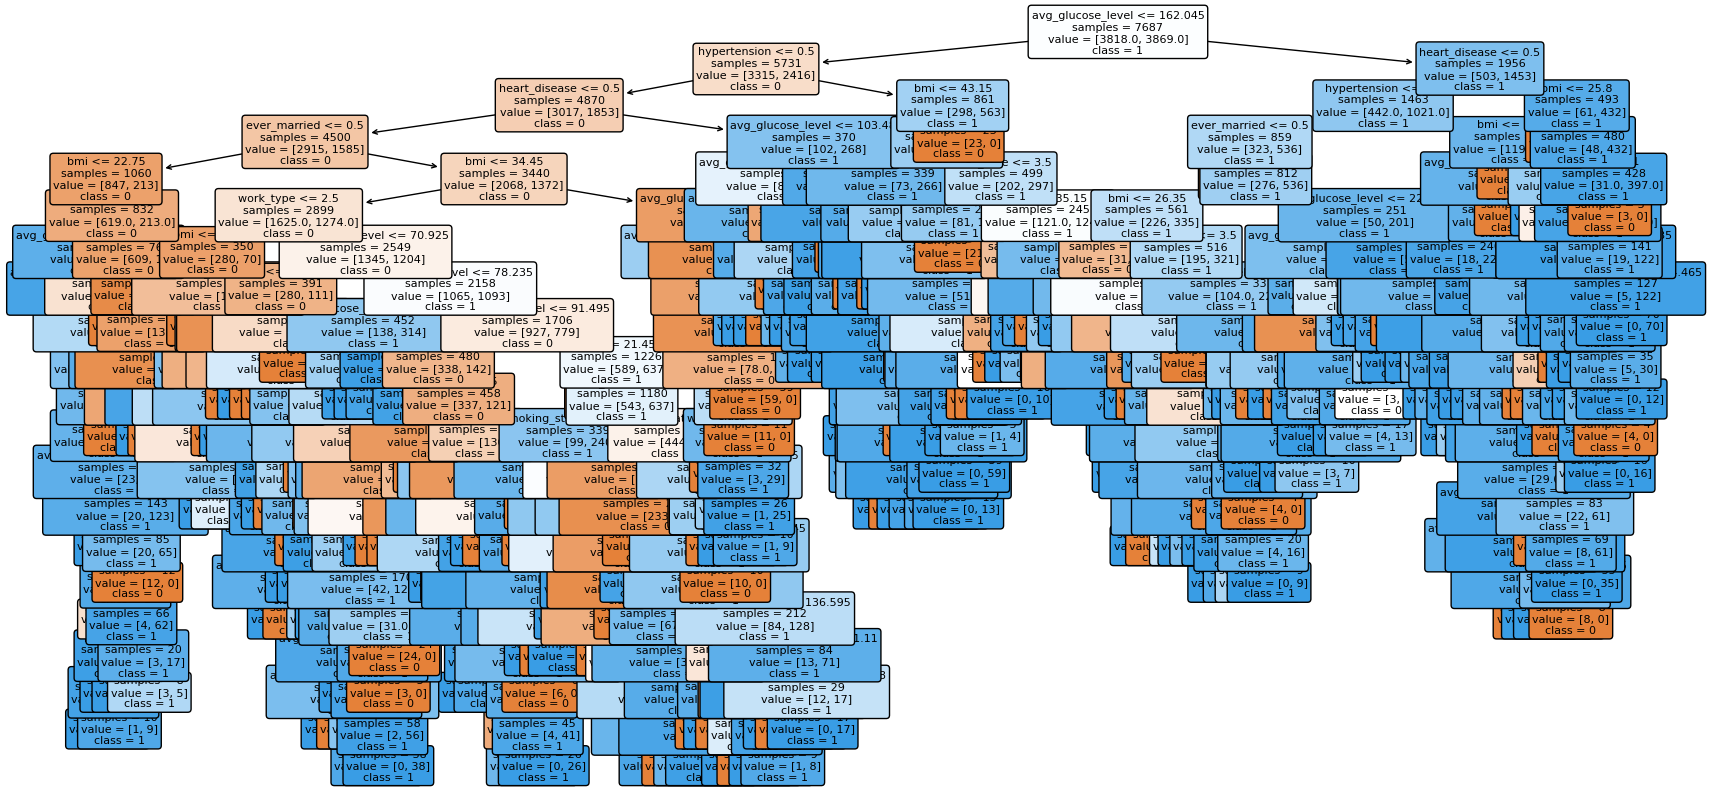

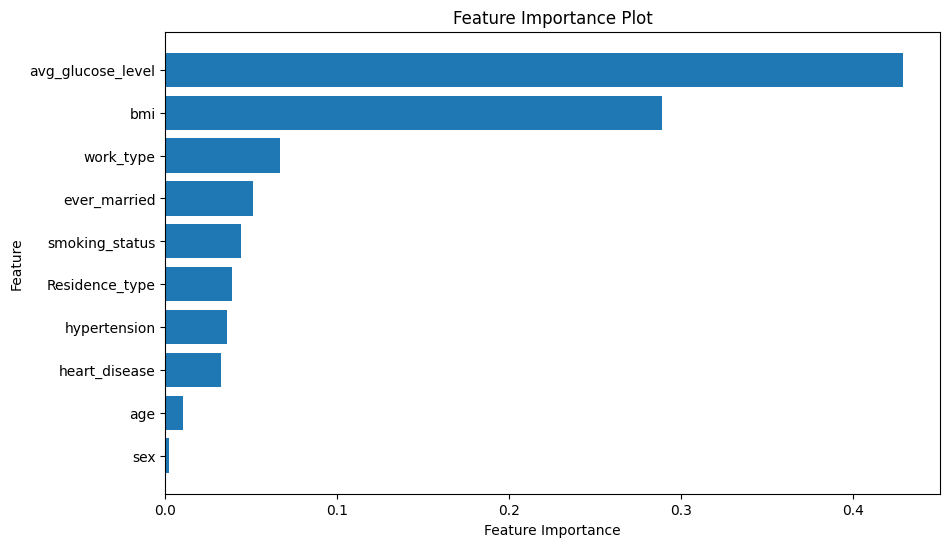

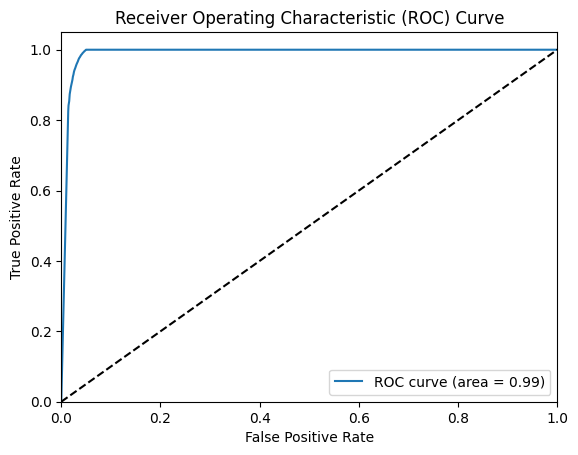

AUC Score: 0.9899357404078608


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9570871261378413, 0.9674902470741222, 0.9544863459037711, 0.9687906371911573, 0.9570871261378413, 0.9596879063719116, 0.9557867360208062, 0.9583333333333334, 0.9635416666666666, 0.95703125]
Mean accuracy: 0.9599322374837451
95% confidence interval: (0.9563738860097839, 0.9634905889577063)


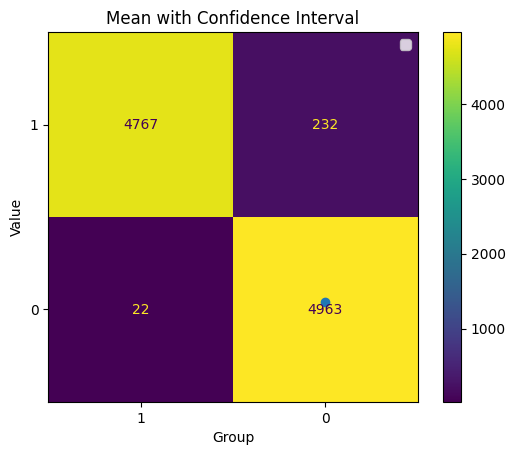

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 42.618210315704346
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 4, 'max_iter': 266, 'min_samples_leaf': 14}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3818
           1       1.00      1.00      1.00      3869

    accuracy                           1.00      7687
   macro avg       1.00      1.00      1.00      7687
weighted avg       1.00      1.00      1.00      7687

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1668
           1       0.97      1.00      0.98      1627

    accuracy                           0.98      3295
   macro avg       0.99      0.99      0.98      3295
weighted avg       0.99      0.98      0.98      3295

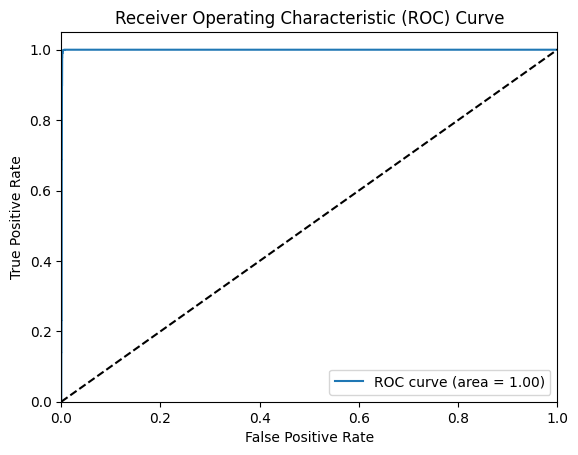

AUC Score: 0.9990218304443236


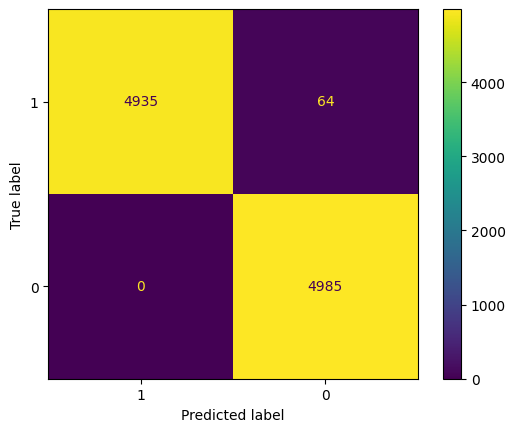

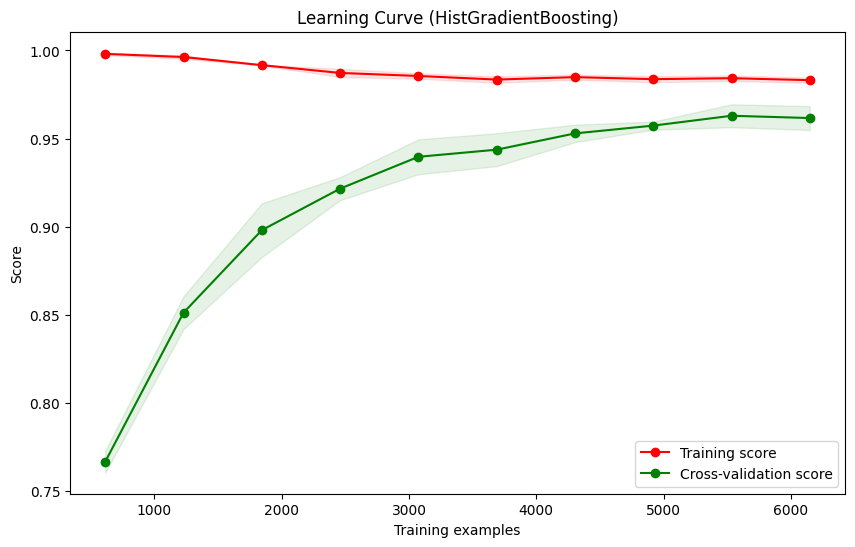

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9843953185955787, 0.9830949284785435, 0.9869960988296489, 0.9817945383615084, 0.976592977893368, 0.9830949284785435, 0.9778933680104032, 0.9856770833333334, 0.97265625, 0.9830729166666666]
Mean accuracy: 0.9815268408647594
95% confidence interval: (0.9783367645052662, 0.9847169172242526)


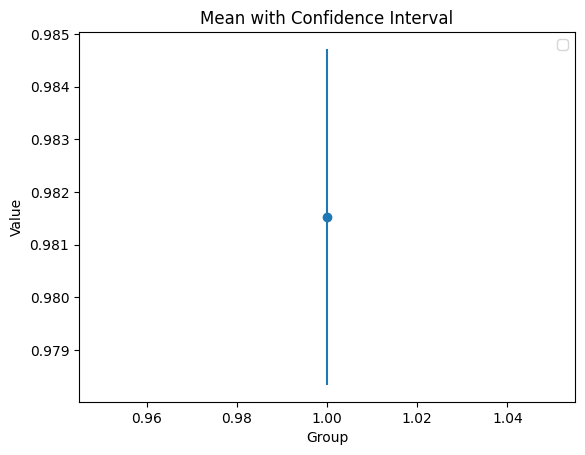

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')